In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [3]:
columns_names=['sepal_length','sepal_width','petal_length','petal_width','class']
raw_dataset=pd.read_csv('data/iris.data.csv',names=columns_names)
raw_dataset.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
dataset=pd.get_dummies(raw_dataset,prefix='',prefix_sep='')
dataset.tail()

,sepal_length,sepal_width,petal_length,petal_width,Iris-setosa,Iris-versicolor,Iris-virginica
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1
149,5.9,3.0,5.1,1.8,0,0,1


In [5]:
train_dataset=dataset.sample(frac=.8,random_state=0)
test_dataset=dataset.drop(train_dataset.index)

In [6]:
train_features=train_dataset[['sepal_length','sepal_width','petal_length','petal_width']]
train_labels=train_dataset[['Iris-setosa','Iris-versicolor','Iris-virginica']]

test_features=test_dataset[['sepal_length','sepal_width','petal_length','petal_width']]
test_label=test_dataset[['Iris-setosa','Iris-versicolor','Iris-virginica']]

In [7]:
train_features.shape

(120, 4)

In [8]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers.experimental import preprocessing

In [9]:
normalizer=preprocessing.Normalization(input_shape=[4,])

In [10]:
normalizer.adapt(np.asarray(train_features))

In [11]:
normalizer.mean.numpy()

array([5.8233333, 3.0508332, 3.7525   , 1.2      ], dtype=float32)

In [12]:
print('original',np.asarray(train_features[:1]))
print()
print('normalized',normalizer(np.asarray(train_features[:1])).numpy())

original [[5.8 2.8 5.1 2.4]]

normalized [[-0.02827565 -0.57469636  0.7718723   1.5943413 ]]


In [164]:
model=Sequential()
model.add(normalizer)
model.add(Dense(144, activation='relu'))
model.add(Dense(144, activation='relu'))
model.add(Dense(144, activation='relu'))
model.add(Dense(144, activation='relu'))
model.add(Dense(144, activation='relu'))
model.add(Dense(144, activation='relu'))
model.add(Dense(144, activation='relu'))
model.add(Dense(144, activation='relu'))
model.add(Dense(144, activation='relu'))
model.add(Dense(144, activation='relu'))
model.add(Dense(144, activation='relu'))
model.add(Dense(144, activation='relu'))
model.add(Dense(144, activation='relu'))
model.add(Dense(144, activation='relu'))
model.add(Dense(144, activation='relu'))
model.add(Dense(144, activation='relu'))
model.add(Dense(144, activation='relu'))
model.add(Dense(144, activation='relu'))
model.add(Dense(144, activation='relu'))
model.add(Dense(144, activation='relu'))
model.add(Dense(144, activation='relu'))
model.add(Dense(144, activation='relu'))
model.add(Dense(3,activation='softmax'))

In [165]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 4)                 9         
_________________________________________________________________
dense_44 (Dense)             (None, 144)               720       
_________________________________________________________________
dense_45 (Dense)             (None, 144)               20880     
_________________________________________________________________
dense_46 (Dense)             (None, 144)               20880     
_________________________________________________________________
dense_47 (Dense)             (None, 144)               20880     
_________________________________________________________________
dense_48 (Dense)             (None, 144)               20880     
_________________________________________________________________
dense_49 (Dense)             (None, 144)             

In [166]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.001),loss='categorical_crossentropy', metrics=['accuracy'])

In [167]:
model.predict(train_features[:10])

array([[0.33342293, 0.33326146, 0.33331558],
       [0.3334125 , 0.3332826 , 0.33330488],
       [0.33349055, 0.33320808, 0.33330134],
       [0.3334851 , 0.33320963, 0.33330533],
       [0.33345968, 0.33322495, 0.33331537],
       [0.33349785, 0.33320388, 0.33329824],
       [0.33345926, 0.3332327 , 0.3333081 ],
       [0.33342052, 0.33326226, 0.33331716],
       [0.33340168, 0.33327016, 0.33332813],
       [0.33335575, 0.33331963, 0.33332455]], dtype=float32)

In [168]:
history=model.fit(
    train_features,
    train_labels,
    validation_split=.2,
    epochs=50
)

Train on 96 samples, validate on 24 samples
Epoch 1/50
96/96 [==============================] - 3s 31ms/sample - loss: 1.0993 - accuracy: 0.3438 - val_loss: 1.0933 - val_accuracy: 0.7083
Epoch 2/50
96/96 [==============================] - 0s 591us/sample - loss: 1.0849 - accuracy: 0.5625 - val_loss: 1.0118 - val_accuracy: 0.7500
Epoch 3/50
96/96 [==============================] - 0s 499us/sample - loss: 0.9651 - accuracy: 0.6562 - val_loss: 0.6034 - val_accuracy: 0.7083
Epoch 4/50
96/96 [==============================] - 0s 499us/sample - loss: 0.7805 - accuracy: 0.6562 - val_loss: 0.5260 - val_accuracy: 0.7500
Epoch 5/50
96/96 [==============================] - 0s 532us/sample - loss: 0.7466 - accuracy: 0.6458 - val_loss: 0.4989 - val_accuracy: 0.7500
Epoch 6/50
96/96 [==============================] - 0s 485us/sample - loss: 0.6929 - accuracy: 0.6562 - val_loss: 0.4427 - val_accuracy: 0.7500
Epoch 7/50
96/96 [==============================] - 0s 499us/sample - loss: 0.5862 - accuracy

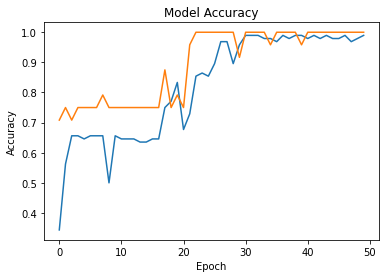

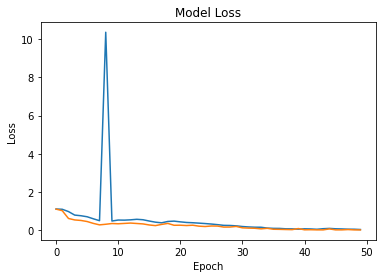

In [169]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.ylim()
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()


In [170]:
predict_classes=model.predict_classes(test_features)
predict_classes=pd.Series(predict_classes)
predict_classes=predict_classes.map({0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'})
predict_classes

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10    Iris-versicolor
11    Iris-versicolor
12     Iris-virginica
13     Iris-virginica
14     Iris-virginica
15    Iris-versicolor
16    Iris-versicolor
17    Iris-versicolor
18    Iris-versicolor
19    Iris-versicolor
20    Iris-versicolor
21     Iris-virginica
22     Iris-virginica
23     Iris-virginica
24     Iris-virginica
25     Iris-virginica
26     Iris-virginica
27     Iris-virginica
28     Iris-virginica
29     Iris-virginica
dtype: object

In [171]:
true_classes=test_label.idxmax(axis=1)
true_classes

9          Iris-setosa
14         Iris-setosa
19         Iris-setosa
21         Iris-setosa
25         Iris-setosa
29         Iris-setosa
36         Iris-setosa
39         Iris-setosa
47         Iris-setosa
49         Iris-setosa
58     Iris-versicolor
67     Iris-versicolor
70     Iris-versicolor
72     Iris-versicolor
77     Iris-versicolor
79     Iris-versicolor
81     Iris-versicolor
82     Iris-versicolor
87     Iris-versicolor
88     Iris-versicolor
99     Iris-versicolor
103     Iris-virginica
115     Iris-virginica
117     Iris-virginica
122     Iris-virginica
130     Iris-virginica
136     Iris-virginica
140     Iris-virginica
142     Iris-virginica
145     Iris-virginica
dtype: object

In [172]:
from sklearn.metrics import accuracy_score
accuracy_score(true_classes,predict_classes)

0.9

In [173]:
from sklearn.metrics import confusion_matrix

In [174]:
cm=confusion_matrix(true_classes,predict_classes)
print(cm)

[[10  0  0]
 [ 0  8  3]
 [ 0  0  9]]


In [155]:
import seaborn as sns

[Text(0, 0.5, 'Iris-setosa'),
 Text(0, 1.5, 'Iris-versicolor'),
 Text(0, 2.5, 'Iris-virginica')]

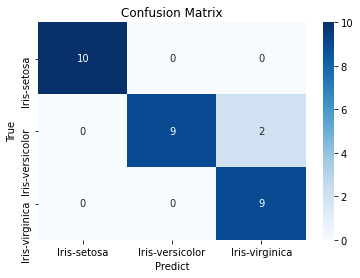

In [156]:
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax, cmap='Blues')
ax.set_xlabel('Predict')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Iris-setosa','Iris-versicolor','Iris-virginica'])
ax.yaxis.set_ticklabels(['Iris-setosa','Iris-versicolor','Iris-virginica'])
